In [69]:
import scipy.stats as ss
import statsmodels.stats.power as smp
import numpy as np
from statsmodels.stats.power import TTestIndPower
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import linregress
import scipy.stats as stats

In [70]:
path = "C:/Users/dardo/Desktop/Curso_estadistica/Trabajo_Final/Trabajo_Final_Dallachiesa/Tabla_Plantas.csv"
legumes = pd.read_csv(path,sep=';')
legumes

,Planta,Población,Altura (cm),Temperatura (°C),Humedad (%),Crecimiento
0,Glycine max,100,30.5,25,60,Óptimo
1,Phaseolus vulgaris,80,25.2,28,55,Deficiente
2,Medicago truncatula,120,32.1,23,58,Óptimo
3,Glycine max,95,28.9,27,62,Óptimo
4,Phaseolus vulgaris,85,26.5,26,59,Deficiente
5,Medicago truncatula,110,31.3,24,61,Óptimo
6,Glycine max,105,29.8,25,63,Óptimo
7,Phaseolus vulgaris,75,24.7,29,56,Deficiente
8,Medicago truncatula,115,30.9,22,57,Óptimo
9,Glycine max,90,27.6,26,64,Óptimo


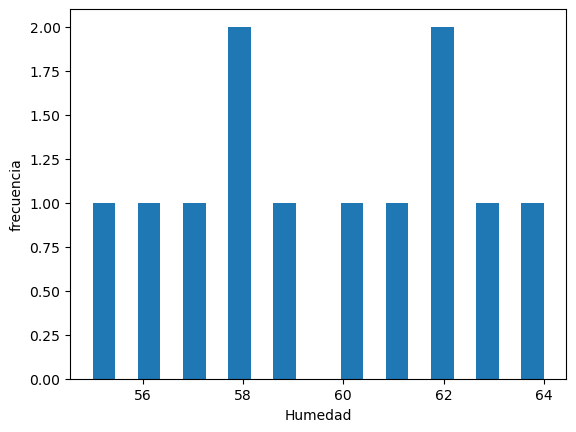

In [71]:
x = legumes['Humedad (%)']
plt.hist(x, bins=20)
plt.ylabel('frecuencia');
plt.xlabel('Humedad');

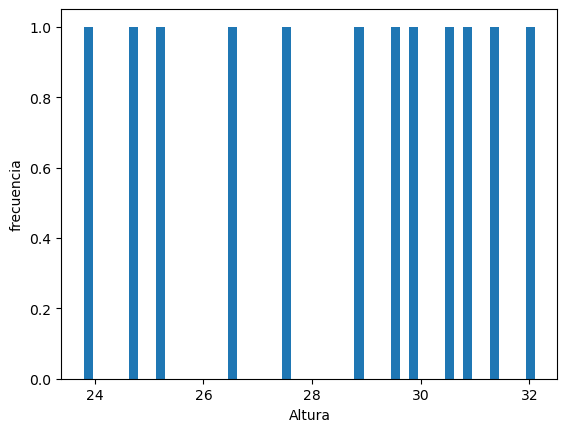

In [72]:
x = legumes['Altura (cm)']
plt.hist(x, bins=50)
plt.ylabel('frecuencia');
plt.xlabel('Altura');

In [73]:
effect_size = abs((legumes['Altura (cm)'].max()-legumes['Altura (cm)'].min())/legumes['Altura (cm)'].std())   
# diferencia de medias esperada
alpha = 0.05      # nivel de significancia
power = 0.8       # potencia
ratio = 1         # relación entre los tamaños de las muestras
n1 = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print("El tamaño muestral necesario es:", round(n1))

El tamaño muestral necesario es: 3


c:\Users\dardo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Users\dardo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [74]:
effect_size = abs((legumes['Humedad (%)'].max()-legumes['Humedad (%)'].min())/legumes['Humedad (%)'].std())   
# diferencia de medias esperada
alpha = 0.05      # nivel de significancia
power = 0.8       # potencia
ratio = 1         # relación entre los tamaños de las muestras
n2 = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print("El tamaño muestral necesario es:", round(n2))

El tamaño muestral necesario es: 3


In [75]:
# Calcular la media y la desviación estándar de altura
datos1= np.mean(legumes['Altura (cm)'])
datos_std1 = np.std(legumes['Altura (cm)'], ddof=1)
print (datos1)
print (datos_std1)

28.400000000000002
2.7882871901124995


In [76]:
# Calcular la media y la desviación estándar de humedad
datos2= np.mean(legumes['Humedad (%)'])
datos_std2 = np.std(legumes['Humedad (%)'], ddof=1)
print (datos2)
print (datos_std2)

59.583333333333336
2.874917653629668


In [77]:
# Intervalo de confianza altura
# Datos muestrales
media_altura = 28.400000000000002
desviacion_std_altura = 2.7882871901124995
tamaño_muestra = 3

# Nivel de confianza (95%)
nivel_confianza = 0.95

# Cálculo del intervalo de confianza
error_estandar = desviacion_std_altura / (tamaño_muestra ** 0.5)
intervalo_confianza = stats.t.interval(nivel_confianza, tamaño_muestra - 1, media_altura, error_estandar)

print("Intervalo de confianza para la altura:")
print("Media:", media_altura)
print("Intervalo de confianza:", intervalo_confianza)

Intervalo de confianza para la altura:
Media: 28.400000000000002
Intervalo de confianza: (21.473510639590693, 35.32648936040931)


In [78]:
# Intervalo de confianza humedad
# Datos muestrales
media_humedad = 59.583333333333336
desviacion_std_altura = 2.874917653629668
tamaño_muestra = 3

# Nivel de confianza (95%)
nivel_confianza = 0.95

# Cálculo del intervalo de confianza
error_estandar = desviacion_std_altura / (tamaño_muestra ** 0.5)
intervalo_confianza = stats.t.interval(nivel_confianza, tamaño_muestra - 1, media_altura, error_estandar)

print("Intervalo de confianza para la altura:")
print("Media:", media_altura)
print("Intervalo de confianza:", intervalo_confianza)

Intervalo de confianza para la altura:
Media: 28.400000000000002
Intervalo de confianza: (21.258308638173187, 35.541691361826814)


In [79]:
print(ss.normaltest(legumes['Altura (cm)'], axis=0, nan_policy='propagate'))
print(ss.shapiro(legumes['Altura (cm)']))

NormaltestResult(statistic=1.8910785976421935, pvalue=0.38847001297963046)
ShapiroResult(statistic=0.9330066442489624, pvalue=0.41307348012924194)


c:\Users\dardo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [80]:
print(ss.normaltest(legumes['Humedad (%)'], axis=0, nan_policy='propagate'))
print(ss.shapiro(legumes['Humedad (%)']))

NormaltestResult(statistic=1.1365060230180863, pvalue=0.5665142686180424)
ShapiroResult(statistic=0.9658291339874268, pvalue=0.8626019954681396)


In [81]:
ss.ttest_ind(legumes['Altura (cm)'], legumes['Humedad (%)'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
ss.ttest_ind_from_stats(datos1, datos_std1, n1, datos2, datos_std2, n2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-13.53353895715043, pvalue=0.00016243814853461255)

In [82]:
#tabla de contingencia (encontrar relación entre variables)

df1 = pd.crosstab(legumes['Altura (cm)'] >= 28.0, legumes['Crecimiento'] == 'Óptimo')
print(df1)

#comparamos los datos en una tabla de contingencia
groups = df1.groupby([legumes['Altura (cm)'],legumes['Crecimiento']]).count() 
print (groups)
#graficar porcentaje 

Crecimiento  False  True 
Altura (cm)              
False            4      1
True             0      7
Empty DataFrame
Columns: [False, True]
Index: []


In [83]:
#Test de comparación de datos cualitativos (necesita una tabla de contingencia)
# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(legumes['Altura (cm)'] >= 28.0, legumes['Crecimiento'] == 'Óptimo')

# Realizar el test de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimir los resultados
print("chi cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Valores esperados:", expected)

chi cuadrado: 5.185714285714285
Valor p: 0.022773309501244822
Grados de libertad: 1
Valores esperados: [[1.66666667 3.33333333]
 [2.33333333 4.66666667]]


In [84]:
# Obtener los datos de altura y humedad
humedad = legumes['Humedad (%)']
altura = legumes['Altura (cm)']

# Calcular la recta de regresión
slope, intercept, r_value, p_value, std_err = linregress(altura, humedad)

print("(r):", r_value)
print("P value:", p_value)
print("Coeficiente de regresión (pendiente):", slope)
print("Error estándar:", std_err)


(r): 0.38672191231018677
P value: 0.21429805054468382
Coeficiente de regresión (pendiente): 0.3987371375116933
Error estándar: 0.3006846923850679


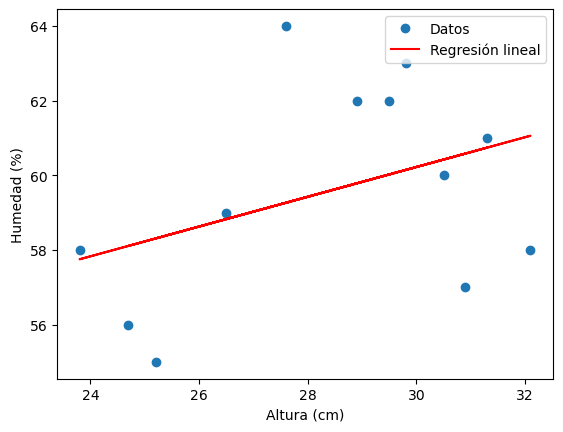

In [85]:
# Calcular los valores predichos de humedad
predicciones_humedad = slope * altura + intercept

# Graficar los datos y la recta de regresión
plt.plot(altura, humedad, 'o', label='Datos')
plt.plot(altura, predicciones_humedad, color='red', label='Regresión lineal')
plt.xlabel('Altura (cm)')
plt.ylabel('Humedad (%)')
plt.legend()
plt.show()